In [4]:
#Dependencies
#To print summary statistics
import pandas as pd
#To visualize each analysis
import matplotlib.pyplot as plt
import numpy as np
#To create and manipulate MySQL Database Hawaii
import sqlalchemy
from sqlalchemy.dialects.postgresql import INT4RANGE
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Date, Numeric, Text, Float
#use Datetime import Datetime
import datetime as dt

In [5]:
# Step 3 - Climate Analysis and Exploration
# You are now ready to use Python and SQLAlchemy to do basic climate analysis 
#and data exploration on your new weather station tables. 
#All of the following analysis should be completed using SQLAlchemy 
#ORM queries, Pandas, and Matplotlib.
# Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

In [6]:
#Use engine and connection to connect to database hawaii.sqlite
hawaii_db = ("sqlite:///hawaii.sqlite")
engine = create_engine(hawaii_db)
conn = engine.connect()

In [7]:
# Use SQLAlchemy automap_base() to:
Base = automap_base()
#reflect your tables into classes and 
Base.prepare(engine, reflect=True) #Set true to cast reflection
#save a reference to those classes called Station and Measurement.
Base.classes.keys()
#Variable reference for measurement
measurement = Base.classes.measurement
#Variable reference for Station
station = Base.classes.station
#connect session to database
session = Session(engine)

## Inspector

In [8]:
#Print Columns using Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
#Use inspector to check column names and TYPES
columns = inspector.get_columns("measurement")
for column in columns:
    print(column["name"], column["type"])

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [10]:
engine.execute("SELECT * FROM measurement").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', 0.0, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397'

## Precipitation Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data.
latest_date = session.query(measurement.date).\
filter(measurement.station == 'USC00511918').\
order_by(measurement.date.desc()).first()
print("Latest CSV Date:", latest_date)
#12 Months Ago
date_range = session.query(measurement.station, measurement.date).\
filter(measurement.station == 'USC00511918').\
filter(measurement.date <= "2015-10-30").\
filter(measurement.date >= "2014-10-30").\
order_by(measurement.date.desc()).all()
print("12 Months Before:", date_range)
session.query(func.count(measurement.station)).\
filter(measurement.station == 'USC00511918').\
filter(measurement.date <= "2015-10-30").\
filter(measurement.date >= "2014-10-30").all()

Latest CSV Date: ('2015-10-30',)
12 Months Before: [('USC00511918', '2015-10-30'), ('USC00511918', '2015-10-29'), ('USC00511918', '2015-10-28'), ('USC00511918', '2015-10-26'), ('USC00511918', '2015-10-25'), ('USC00511918', '2015-10-22'), ('USC00511918', '2015-10-21'), ('USC00511918', '2015-10-20'), ('USC00511918', '2015-10-19'), ('USC00511918', '2015-10-16'), ('USC00511918', '2015-10-15'), ('USC00511918', '2015-10-14'), ('USC00511918', '2015-10-13'), ('USC00511918', '2015-10-12'), ('USC00511918', '2015-10-09'), ('USC00511918', '2015-10-08'), ('USC00511918', '2015-09-25'), ('USC00511918', '2015-09-24'), ('USC00511918', '2015-09-23'), ('USC00511918', '2015-09-22'), ('USC00511918', '2015-09-21'), ('USC00511918', '2015-09-18'), ('USC00511918', '2015-09-17'), ('USC00511918', '2015-09-14'), ('USC00511918', '2015-09-04'), ('USC00511918', '2015-09-03'), ('USC00511918', '2015-09-02'), ('USC00511918', '2015-09-01'), ('USC00511918', '2015-08-30'), ('USC00511918', '2015-08-28'), ('USC00511918', '2

[(250)]

In [46]:
# Select only the date and prcp values.
session.query(measurement.date, measurement.prcp).\
filter(measurement.station == 'USC00511918').\
filter(measurement.date <= "2015-10-30").\
filter(measurement.date >= "2014-10-30").all()
# Load the query results into a Pandas DataFrame and set the index to the date column.
session_df = pd.DataFrame(session.query(measurement.date, measurement.prcp).\
filter(measurement.station == 'USC00511918').\
filter(measurement.date <= "2015-10-30").\
filter(measurement.date >= "2014-10-30").all())
prec_df= session_df.set_index("date").head(10)
prec_df
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
vacation_dates = prec_df
vacation_dates #Vacation ranges from 10-30 to 11-09, 2014

,prcp
date,
2014-10-30,0.00
2014-10-31,0.00
2014-11-02,0.01
2014-11-03,0.03
2014-11-04,0.00
2014-11-05,0.00
2014-11-06,0.04
2014-11-07,0.03
2014-11-08,0.04


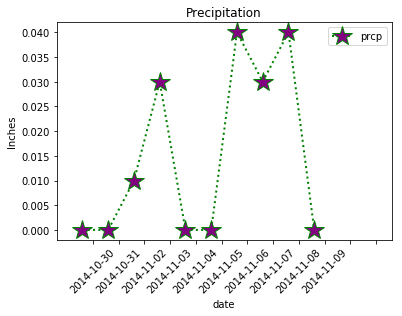

,prcp
count,10.000000
mean,0.015000
std,0.017795
min,0.000000
25%,0.000000
50%,0.005000
75%,0.030000
max,0.040000


In [147]:
# Plot the results using the DataFrame plot method.
prec_plot= prec_df.reset_index()
x_axis = np.arange(0, 12, step=1)
y_axis = np.arange(len("prcp"))
prec_plot.plot("date", "prcp", 
               color="green", 
               marker="*",
               markerfacecolor="purple",
               linestyle=":",
               linewidth=2,
               markeredgecolor="green",
               markersize=20,
               markevery=1
              )
plt.xlim(min(x_axis)-1,max(x_axis)+1)
plt.title("Precipitation")
plt.ylabel("Inches")
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, prec_plot.date[0:12],rotation=45)
# plt.savefig("")
plt.show()
# Use Pandas to print the summary statistics for the precipitation data.
summary = prec_plot.describe()
summary

## Station Analysis

In [ ]:
# Design a query to calculate the total number of stations.

# Design a query to find the most active stations.

# List the stations and observation counts in descending order

# Which station has the highest number of observations?

# Design a query to retrieve the last 12 months of temperature observation data (tobs).

# Filter by the station with the highest number of observations.

# Plot the results as a histogram with bins=12.



## Temperature Analysis

In [ ]:

# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

# Plot the min, avg, and max temperature from your previous query as a bar chart.

# Use the average temperature as the bar height.

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).



## Optional Recommended Analysis

In [ ]:

# The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

# Calcualte the rainfall per weather station using the previous year's matching dates.
# Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

# Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

# Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.

# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

# Use Pandas to plot an area plot (stacked=False) for the daily normals.